# Exploración de datos con pandas

## Importar libreria pandas
*Nota: En caso no tener la librería pandas instalada ejecutar el siguiente comando  **!pip install pandas** .*

In [0]:
#importamos la librería pandas, adicional a ello se le pone el alias pd
import pandas as pd

## Importar data

antes de importar la data me gustaría responderles la siguiente pregunta.

**¿Qué es un DataFrame?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
with open('/gdrive/My Drive/CLASS - DATATHONES/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

In [0]:
#importar data de un archivo csv (comma separated values), df significa dataframe
df = pd.read_csv('/gdrive/My Drive/CLASS - DATATHONES/PANDAS/train.csv')

## Explorar la data
*Ya hemos importado la data, ahora lo que haremos es explorar la data y para ello la librería pandas nos proporciona métodos integrados que pueden usarse para comprender el tipo de datos o para ver la distribución de datos dentro del conjunto de dados.*

**Para ello iniciaremos mostrando las 5 primeras y ultimas filas**

In [5]:
#Visualizar primeras 5 filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#visualizar ultimas 5 filas
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
#mostrar las personas que son del genero masculino
df[df['Sex'] == 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Pero, ¿Cuantas filas y columnas tiene el dataframe?. Pandas tiene un atributo llamado **shape** que nos indica lo siguiente:
el primer numero es el número de filas, y el segundo número es el número de columnas.

In [15]:
# Pandas nos indica que para este ejemplo tenemos 891 filas y 12 columnas
df.shape  #(filas,columns)

(891, 12)

También se me viene otra pregunta en mente, ¿Como saber el nombre de todas mis columnas que tengo en el dataframe?, pues pandas tambien te lo puede decir, con el siguiente comando.

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ademas la librería pandas nos permite identificar el tipo de variables de cada columna, para ello llamaremos al metodo **info()**, Antes de adentrarnos con los métodos debemos tener claro sobre la variedad de tipos de datos que podemos encontrar. Los que comúnmente se manejan con Pandas son:
<img src="tipos.jpg" width="700" />

In [17]:
# El siguiente metodo nos muestra que las siguientes columnas tienen valores nulos ['Age', 'Cabin', 'Embarked']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
columns_list = df.columns.tolist()
print(columns_list)

for columns in columns_list:
  print("La columna {0} tiene {1} valores nulos".format(columns, df[columns].isnull().sum()))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
La columna PassengerId tiene 0 valores nulos
La columna Survived tiene 0 valores nulos
La columna Pclass tiene 0 valores nulos
La columna Name tiene 0 valores nulos
La columna Sex tiene 0 valores nulos
La columna Age tiene 177 valores nulos
La columna SibSp tiene 0 valores nulos
La columna Parch tiene 0 valores nulos
La columna Ticket tiene 0 valores nulos
La columna Fare tiene 0 valores nulos
La columna Cabin tiene 687 valores nulos
La columna Embarked tiene 2 valores nulos


**El metodo nos dice lo siguiente:**
* la primera fila nos informa el tipo de df, es decir un tipo **DataFrame**.
* la segunda fila se refiere al total de filas que tiene el dataframe.
* la tercera fila se refiere al total de columnas que tiene el dataframe.

luego se puede apreciar una pequeña tabla pero sin bordes
* **la primera columna** se refiere, valga la redundancia, al nombre de las columnas del dataframe, **la segunda columna** se refiere al número de filas que tiene cada columna y **la tercera columna** se refiere al tipo de columna

por último y menos importante, las dos últimas filas intican los siguiente.
* **dtypes** dice el conteo de las columnas que tienen determinados tipos de variables.
* La ultima fila informa la memoria que se usa en el programa.

In [20]:
# Atributo para saber el tipo de cada columna
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Tambien podemos ver los valores maximos, minimos, promedio y desviación estandar.

In [21]:
print('La edad maxima de los pasajeros es: {}'.format(df['Age'].max()))
print('La edad minima de los pasajeros es: {}'.format(df['Age'].min()))
print('La edad promedio de los pasajeros es: {}'.format(df['Age'].mean()))
print('La desviación estandar de los sobrevivientes es: {}'.format(df['Survived'].std()))

La edad maxima de los pasajeros es: 80.0
La edad minima de los pasajeros es: 0.42
La edad promedio de los pasajeros es: 29.69911764705882
La desviación estandar de los sobrevivientes es: 0.4865924542648585


imaginense lo tedioso que debe ser averiguar el maximo o minimo de cada columna, Pandas tiene un super metodo que realiza todo en conjunto para cada columna, pues sí, con el metodo **describe()**.

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


pero que hay da las columnas de tipo **object**, pues el metodo tambien tiene un parametro donde se puede incluir las columnas.

In [24]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,3,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mr. Antoni",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,576,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [23]:
#Tabla Cruzada
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
anonimus,1,0
female,81,233
male,467,109


In [25]:
#Pandas Series 
s1 = pd.Series([0, 1], index=['a', 'b'])
print(s1)
s2 = pd.Series([2, 'alex', 4], index=['c', 'd', 'e'])
print('*' * 100)
# Concatenamos 
pd.concat([s1, s2])

a    0
b    1
dtype: int64
****************************************************************************************************


a       0
b       1
c       2
d    alex
e       4
dtype: object

In [26]:
#Pivotear en agrupaciones
df[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(['Survived'],ascending=False)

,Survived
Sex,
female,233
male,109
anonimus,0


## Clase Extra, Graficos con Seaborn(sns) y matplotlib.pyplot (plt)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


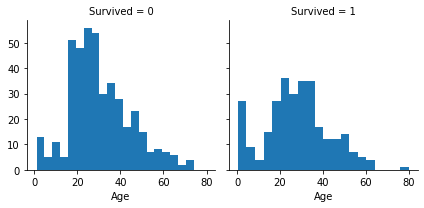

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Fin de la clase!.**

## ¿Que aprendimos hoy?
* Importar data de un archivo plano(csv).
* Ver la data de una manera rapida y sencilla.
* Conocer los tipos de datos que existen en un DataFrame.
* Validar las columnas que tienen valores nulos.
* Calcular los valores minimos, maximos, desviación estandar, promedio y quartiles.
* Saber cuantas filas y columnas tiene nuestro DataFrame.
* Inglés básico

## Tarea

####1) Sabiendo que en la Columna **Sex** tenemos 3 generos, realizar una consulta para ver los 3 tipos de generos.



In [54]:
pd.unique(df['Sex'])

array(['male', 'female', 'anonimus'], dtype=object)

In [59]:
#Pivotear en agrupaciones
df[['Sex', 'PassengerId']].groupby(['Sex']).count().sort_values(['PassengerId'],ascending=False)

,PassengerId
Sex,
male,576
female,314
anonimus,1


*Tenemos 3 generos: 576 varones, 314 mujeres y 1 persona que no registro su sexo.*

####2) Total de personas sobrevivieron, agruparlo por Sexo ( **Sex**) y tipo de clase ( **Pclass** ) y ordenar de forma descendente.

In [41]:
#Tabla Cruzada
pd.crosstab(df.Sex, df.Survived)


Survived,0,1
Sex,,
anonimus,1,0
female,81,233
male,467,109


In [91]:
#Pivotear en agrupaciones
df[['Sex', 'Pclass', 'Survived']].groupby(
    ['Sex','Pclass'], as_index=False).sum().sort_values(by='Survived',ascending=True)

,Sex,Pclass,Survived
0,anonimus,3,0
5,male,2,17
4,male,1,45
6,male,3,47
2,female,2,70
3,female,3,72
1,female,1,91


*Aqui vemos que sobrevivieron 233 mujeres y 109 hombres.*

*   La persona que no registro sexo era de clase 3
*   De los varones: 17 de clase 2, 45 de clase 1 y 47 de clase 3.
*   De las mujeres: 70 de clase 2, 72 de clase 3 y 91 de clase 3.




####3) Cuantos valores nulos tiene la columna **Age**

In [74]:
df['Age'].isnull().sum()

177

####4) Mostrar las personas que tengan 80 años y que haygan sobrevivido

In [79]:
pd.unique(df['Age'])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [90]:
#Pivotear en agrupaciones
df[['Age', 'Survived']].groupby(['Age'], as_index=False).sum().sort_values(['Survived'],ascending=True)

,Age,Survived
14,10.0,0
26,20.5,0
37,28.5,0
40,30.5,0
86,74.0,0
...,...,...
35,27.0,11
47,35.0,11
48,36.0,11
28,22.0,11


In [106]:
#Tabla Cruzada
pd.crosstab(df.Age==80, df.Pclass)

Pclass,1,2,3
Age,,,
False,215,184,491
True,1,0,0


In [97]:
df.Survived[df.Age == 80].value_counts(normalize = False)

1    1
Name: Survived, dtype: int64

In [108]:
df.Survived[df.Age == 27].value_counts(normalize = False)

1    11
0     7
Name: Survived, dtype: int64

*En nuestra data tenemos una persona de 80 años de clase 1 que sobrevivio*